<a href="https://colab.research.google.com/github/gizmo3d/PA3-tutorial/blob/master/Exercice__GLUE__v1___AnthonyF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
from google.colab import files

!jupyter nbconvert Exercice__GLUE__v1___AnthonyF___06-11-202.ipynb --to html

[NbConvertApp] WARNING | pattern 'Exercice__GLUE__v1___AnthonyF___06-11-202.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

In [ ]:
df_glue = sns.load_dataset("glue")

df_glue.dropna(inplace=True)
df.to_csv('glue_dataset.csv', index=False)

# Téléchargez le fichier CSV sur votre machine
files.download('glue_dataset.csv')
df_glue


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Model,Year,Encoder,Task,Score
0,ERNIE,2019,Transformer,CoLA,75.5
1,T5,2019,Transformer,CoLA,71.6
2,RoBERTa,2019,Transformer,CoLA,67.8
3,BERT,2018,Transformer,CoLA,60.5
4,BiLSTM+ELMo,2018,LSTM,CoLA,32.1
...,...,...,...,...,...
59,BERT,2018,Transformer,RTE,70.1
60,BiLSTM+ELMo,2018,LSTM,RTE,57.4
61,BiLSTM+CoVe,2017,LSTM,RTE,52.7
62,BiLSTM+Attn,2017,LSTM,RTE,58.4


AttributeError: Rectangle.set() got an unexpected keyword argument 'hue'

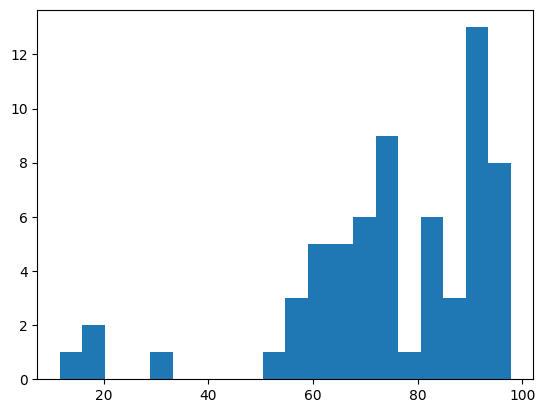

In [ ]:
from matplotlib import pyplot as plt
df['Score'].plot(kind='hist', bins=20, title='Score', hue='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
df['Score'].plot(kind='hist', bins=20, title='Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

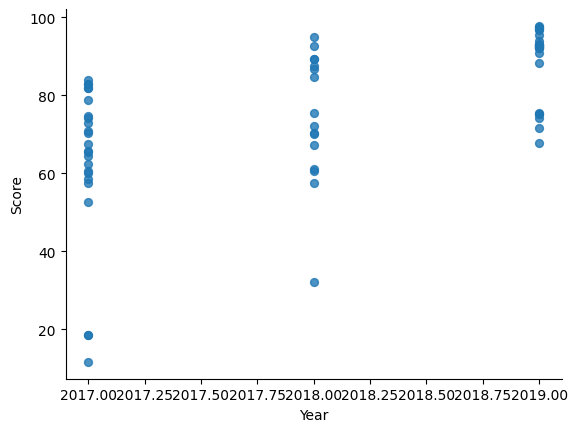

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Year', y='Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# **# Question 1 : D'où vient le dataset GLUE**:

*   **GLUE** sinifie **G**eneral **L**anguage **U**nderstanding **E**valuation  

*   Il sert de benchmark que l'on peut trouver sur le site officiel suivant : https://gluebenchmark.com

GLUE est un ensemble de tests que n'importe quel modèle de traitement du langage naturel peut utiliser pour mesurer sa performance.   

Il est conçu pour être flexible et ouvert à une large gamme de modèles, tant qu'ils savent travailler avec des phrases et des relations entre phrases.  
  
Apparemment relève du NLP













# **Question 2 : que signifie la variable `score` ?**    

A première vue, c'est la mesure de la performance   

Comment vérifier ??  

Sur le site officiel, dans la partie FAQ - question 10 - il est précisé  

 All metrics are scaled by 100x (i.e., as percentages).   

 These scores are then averaged to get the final score






In [ ]:
max_score = df['Score'].max()
min_score = df['Score'].min()
print("Valeur maximale :", max_score)
print("Valeur minimale :", min_score)


Valeur maximale : 97.8
Valeur minimale : 11.6


In [ ]:
df['Score'].describe()


,Score
count,64.000000
mean,75.579688
std,19.289698
min,11.600000
25%,66.800000
50%,75.500000
75%,92.225000
max,97.800000


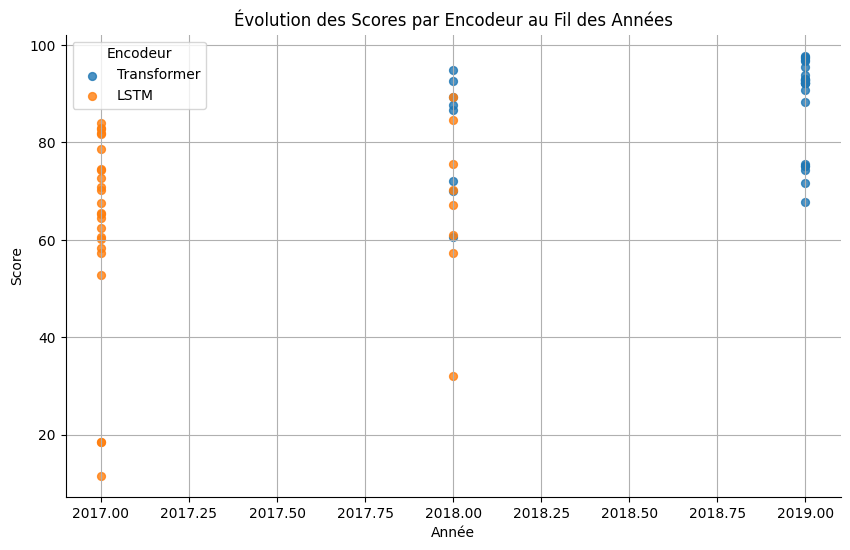

In [ ]:
# Création d'un scatter plot pour chaque encodeur avec des couleurs différentes
plt.figure(figsize=(10, 6))

# Boucle pour tracer les points par encodeur
for encoder in df['Encoder'].unique():
    subset = df[df['Encoder'] == encoder]
    plt.scatter(subset['Year'], subset['Score'], s=32, alpha=0.8, label=encoder)

# Personnalisation de l'apparence du graphique
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Évolution des Scores par Encodeur au Fil des Années")
plt.xlabel("Année")
plt.ylabel("Score")
plt.legend(title="Encodeur")
plt.grid(True)

# Affichage du graphique
plt.show()

cwvdwv


In [ ]:
# Vérifie le nombre de points par encodeur et par année
df_glue.groupby(['Encoder', 'Year']).size()


Encoder      Year
LSTM         2017    24
             2018     8
Transformer  2018     8
             2019    24
dtype: int64

# **Question 3 : quel est le meilleur graphique possible pour montrer à un client l'évolution du score des différents encoder sur les dernières années ??**

# Je penche pour celui-ci, ceux en dessous sont moins lisibles

# Dans ce dataset précis, LSTM et Transformers coexistent uniquement pour l'année 2018


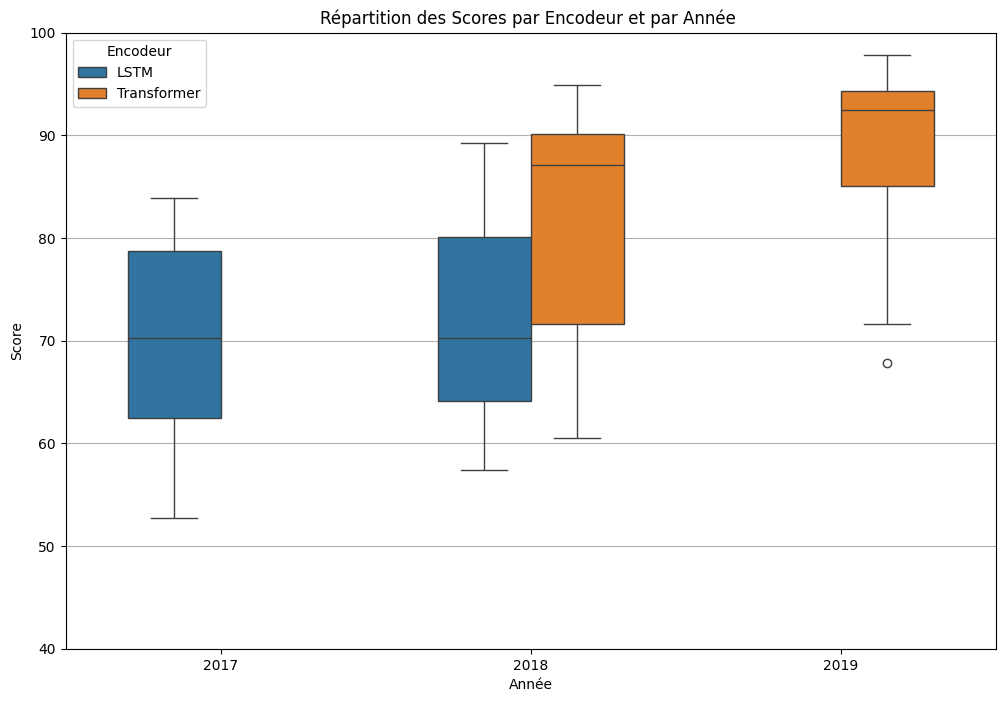

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrer les données pour inclure uniquement les scores entre 40 et 100
df_filtered = df[(df['Score'] >= 40) & (df['Score'] <= 100)]

# Création du box plot avec des dimensions ajustées
plt.figure(figsize=(12, 8))  # Ajustement de la taille pour meilleure lisibilité
sns.boxplot(data=df_filtered, x='Year', y='Score', hue='Encoder', width=0.6)

# Personnalisation du graphique
plt.title("Répartition des Scores par Encodeur et par Année ")
plt.xlabel("Année")
plt.ylabel("Score")
plt.ylim(40, 100)  # Limite de l'axe vertical aux scores de 40 à 100
plt.legend(title="Encodeur", loc="upper left")
plt.grid(True, axis='y')

# Affichage du graphique
plt.show()

-------------  
------------  
-----------  
------------  


# Ci-dessous, pour visualiser les outliers

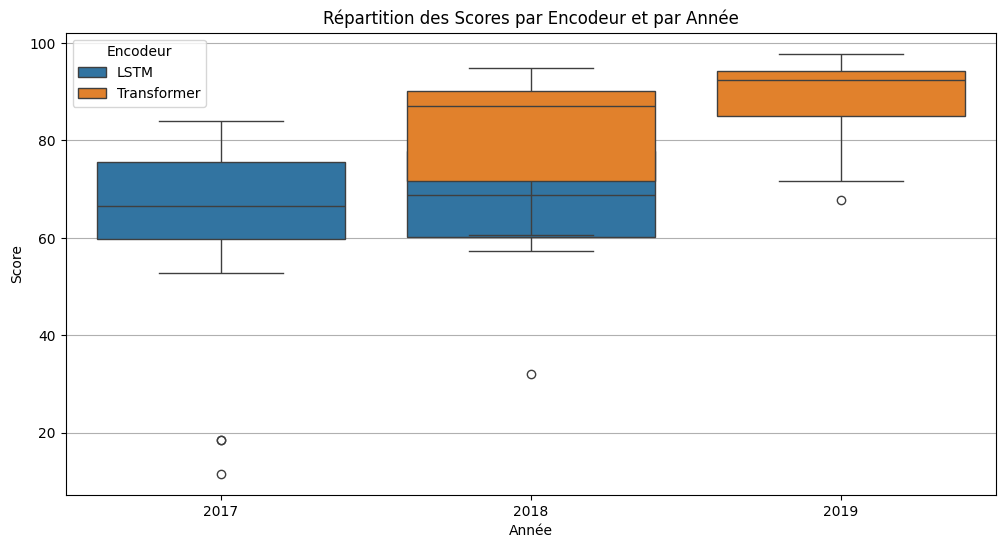

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création du box plot avec alignement vertical des box plots pour chaque année
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Year', y='Score', hue='Encoder', dodge=False)  # Désactiver le dodge pour empiler les boxes

# Personnalisation du graphique
plt.title("Répartition des Scores par Encodeur et par Année")
plt.xlabel("Année")
plt.ylabel("Score")
plt.grid(True, axis='y')
plt.legend(title="Encodeur", loc="upper left")

# Affichage du graphique
plt.show()

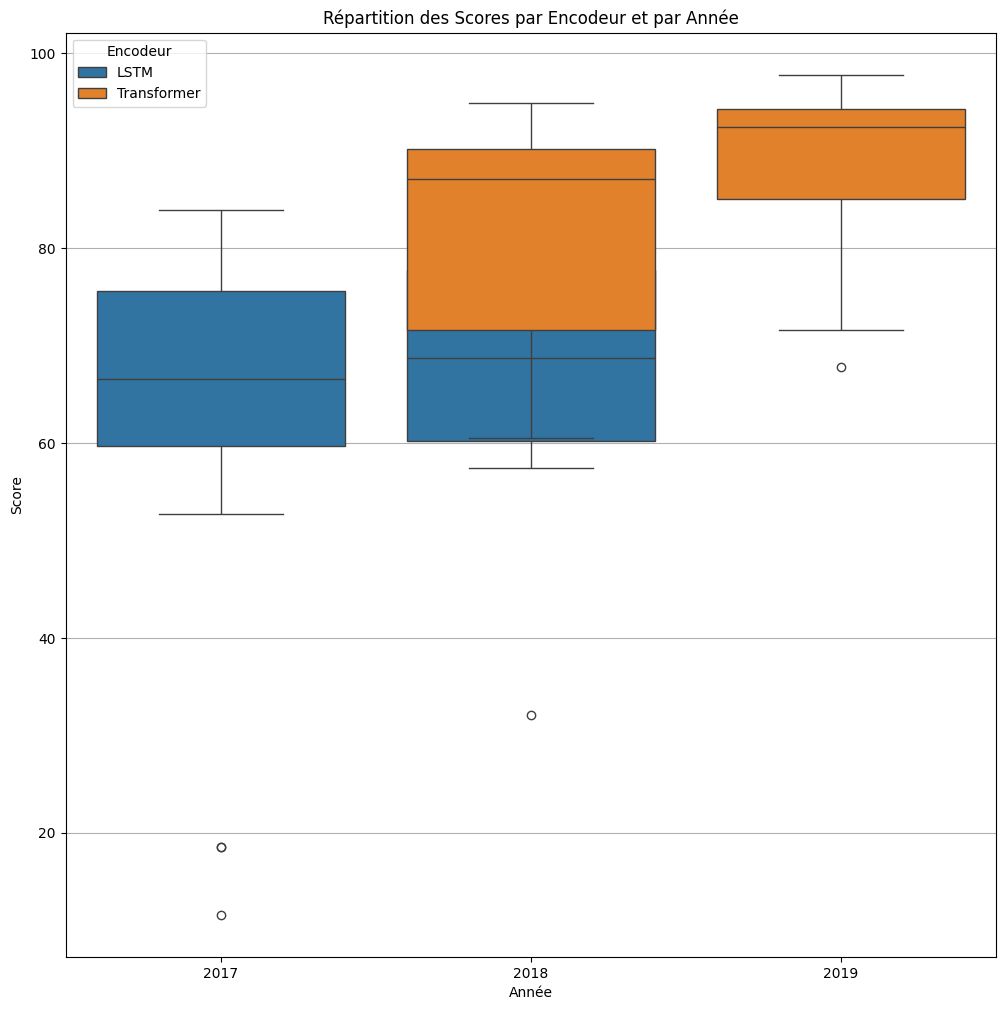

In [36]:
# Créer le box plot avec l'axe vertical agrandi pour une meilleure lisibilité
plt.figure(figsize=(12, 12))  # Double la taille de l'axe vertical

# Création du box plot avec alignement vertical (dodge désactivé) pour chaque encodeur par année
sns.boxplot(data=df, x='Year', y='Score', hue='Encoder', dodge=False)

# Personnalisation du graphique
plt.title("Répartition des Scores par Encodeur et par Année")
plt.xlabel("Année")
plt.ylabel("Score")
plt.grid(True, axis='y')
plt.legend(title="Encodeur", loc="upper left")

# Affichage du graphique
plt.show()

------------------------------------------------------------------------------




# **Question 4 - Est-ce que les LSTM ont en moyenne la même performance que les Transorfmers ?**

In [43]:
from scipy.stats import ttest_1samp

# Définition du seuil de signification
alpha = 0.05

# Calcul des moyennes des scores pour les LSTMs et les Transformers
mean_lstm = df[df['Encoder'] == 'LSTM']['Score'].mean()
transformer_scores = df[df['Encoder'] == 'Transformer']['Score']

# Test de Student pour comparer la moyenne des Transformers avec celle des LSTMs
t_stat, p_value = ttest_1samp(transformer_scores, mean_lstm)

# Conclusion
print("P-value:", p_value)
if p_value < alpha:
    print("On rejette H0: il semble que les Transformers aient une performance moyenne supérieure aux LSTMs (p < alpha) et que cela ne soit pas dû au hasard.")
else:
    print("On ne rejette pas H0: aucune preuve significative que la performance moyenne des Transformers diffère de celle des LSTMs (p >= alpha).")

P-value: 2.339762521546808e-13
On rejette H0: il semble que les Transformers aient une performance moyenne supérieure aux LSTMs (p < alpha) et que cela ne soit pas dû au hasard.
